# Convex Image In-painting

Really cool use of convex optimisatoin which 

https://stanford.edu/~boyd/papers/pdf/cvx_opt_intro.pdf

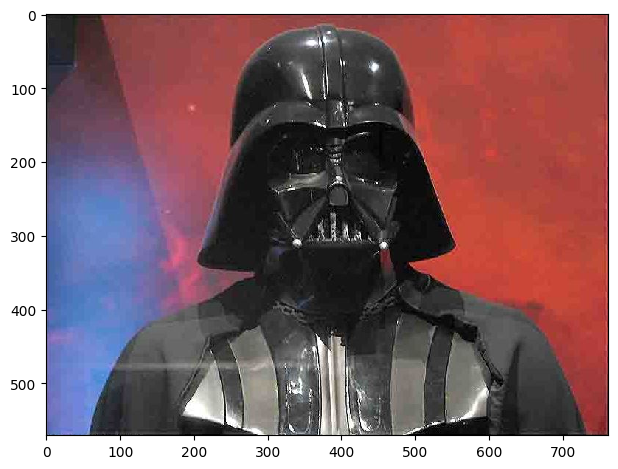

In [10]:
from skimage import io

img = io.imread('vader.png')
io.imshow(img)

# Remove 90% of the information with uniform noise 

In [11]:
img.shape

(571, 762, 3)

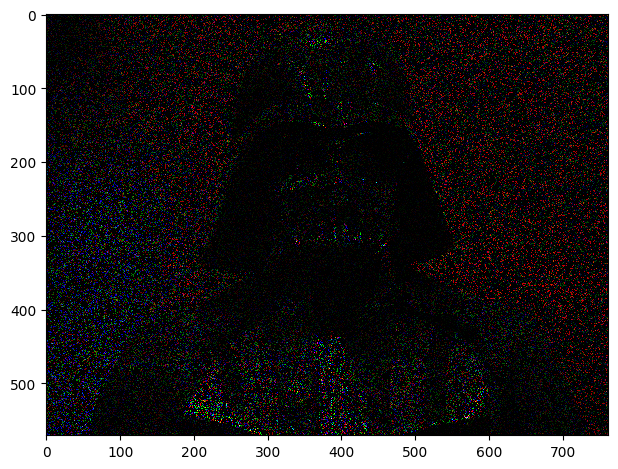

In [12]:
import numpy as np
mask = np.random.uniform(size=img.shape) > 0.1
masked_img = img.copy()
masked_img[mask] = 0
io.imshow(masked_img)

Want to minimise the total variatoin in 3 dimensiosn.

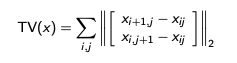

problem = Problem(Minimize(expression), constraints)

In [28]:
cp.SCS()

TypeError: 'str' object is not callable

In [33]:
import cvxpy as cp 

#p = cp.Parameter()
#I = cp.Variable((571, 762,3))
R = cp.Variable((571, 762))
G = cp.Variable((571, 762))
B = cp.Variable((571, 762))

R.value = img[...,0]
G.value = img[...,1]
B.value = img[...,2]

#solver = cp.SCS() # max_iters=100)


total_variation = cp.tv(*[R,G,B])
problem = cp.Problem(cp.Minimize(total_variation))
problem.solve(verbose=True,solver=cp.SCS)
if problem.status not in ["infeasible", "unbounded"]:
    # Otherwise, problem.value is inf or -inf, respectively.
    print("Optimal value: %s" % problem.value)
    for variable in problem.variables():
        print("Variable %s: value %s" % (variable.name(), variable.value))

                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Apr 26 09:30:39 PM: Your problem has 1305306 variables, 0 constraints, and 0 parameters.
(CVXPY) Apr 26 09:30:39 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 26 09:30:39 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 26 09:30:39 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 26 09:30:39 PM: Compiling problem (target solver=SCS).
(CVXPY) Apr 26 09:30:39 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

KeyboardInterrupt: 

# Total variation criterion in numpy

In [ ]:
# A row-only gresycale total varition criterion: 
    
X = np.ones((10,10)) # img[...,0] # 'greyscale' 

bidiag = np.diag(len(X)) + np.diag(len(X)-1, 1)
bidiag

In [21]:
R.value

array([[  0,  14,  14, ...,  93,  68, 112],
       [  9,  42,  59, ..., 173, 102, 144],
       [  0,  38,  62, ..., 172, 107, 147],
       ...,
       [ 20, 119, 108, ..., 141,  52,  91],
       [  0,  44,  36, ...,  68,  43,  81],
       [ 86,  96,  96, ...,  99,  59,  98]], dtype=uint8)